In [1]:
import pandas as pd

In [2]:
# import csv file
import pandas as pd

# Use on_bad_lines='skip' to skip problematic lines and specify the delimiter if needed
df = pd.read_csv('Sample-Superstore.csv', encoding='latin1', on_bad_lines='skip', delimiter=';')

In [3]:
df.info()

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Modify column names to remove spaces
df.columns = df.columns.str.replace(' ', '_')
# Modify column names to remove special characters
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
# modify column names to lowercase
df.columns = df.columns.str.lower()
# show result
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


In [6]:
# Change the data type of 'Order Date' and 'Ship Date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%Y')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%m/%d/%Y')

In [7]:
df.head(20)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [8]:
# add new columns 'year' and 'month' 'day_of_week' to the dataframe
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()

# Insert new columns behind existing column 'order_date'
df.insert(df.columns.get_loc('order_date') + 1, 'year', df.pop('year')) 
df.insert(df.columns.get_loc('year') + 1, 'month', df.pop('month'))
df.insert(df.columns.get_loc('month') + 1, 'day_of_week', df.pop('day_of_week'))

# show result
df.head(20)


,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [9]:
# Calculate the 'price' column based on the formula and insert it before the 'sales' column
# Initialize an empty list to store calculated prices
prices = []

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Calculate the price for the current row
    price = (row['sales'] / row['quantity'] / (1 - row['discount']))
    # Append the rounded price to the list
    prices.append(round(price, 2))

# Assign the calculated prices to the 'price' column
df['price'] = prices

# Insert the 'price' column before the 'sales' column
df.insert(df.columns.get_loc('sales'), 'price', df.pop('price'))

# Show the updated dataframe
df.head() 

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,region,product_id,category,subcategory,product_name,price,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.98,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,7.31,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,348.21,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,13.98,22.3680,2,0.20,2.5164


In [10]:
unique_price_count_per_product = df.groupby('product_id')['price'].nunique()
unique_price_count_per_product.reset_index()

,product_id,price
0,FUR-BO-10000112,1
1,FUR-BO-10000330,1
2,FUR-BO-10000362,1
3,FUR-BO-10000468,1
4,FUR-BO-10000711,1
...,...,...
1889,TEC-PH-10004912,1
1890,TEC-PH-10004922,1
1891,TEC-PH-10004924,1
1892,TEC-PH-10004959,1


In [11]:
unique_price_count_per_product[unique_price_count_per_product > 1].index.tolist()

# Result: no product has more than one unique price

[]

In [12]:
# Take all product_id stored in unique_price_count_per_product and use them to filter the original dataframe and make sure records a sorted by product_id alphabetically and by price in descending order
df_filtered = df[df['product_id'].isin(unique_price_count_per_product[unique_price_count_per_product > 1].index.tolist())]

# Create a csv file with the filtered data
df_filtered.to_csv('filtered_data.csv', index=False)

In [13]:
# Filter the main dataframe df to check if there are records with the same product_name but different product_id
df_filtered2 = df[df['product_name'].isin(
    df[df['product_id'].isin(unique_price_count_per_product[unique_price_count_per_product > 1].index)]['product_name']
) & ~df['product_id'].isin(unique_price_count_per_product[unique_price_count_per_product > 1].index)]

# Create a csv file with the filtered data
df_filtered2.to_csv('filtered_data2.csv', index=False)

# result: no records found

In [14]:
df[df['product_id'] == 'FUR-BO-10002213']

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,region,product_id,category,subcategory,product_name,price,sales,quantity,discount,profit
2115,2116,CA-2015-164882,2015-10-31,2015,10,Saturday,2015-10-31,Same Day,SG-20080,Sandra Glassco,...,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,425.833,1,0.15,20.0392
5918,5919,US-2015-126977,2015-09-17,2015,9,Thursday,2015-09-23,Standard Class,PF-19120,Peter Fuller,...,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,2003.920,5,0.20,-25.0490
6535,6536,CA-2014-128209,2014-11-17,2014,11,Monday,2014-11-22,Standard Class,GT-14710,Greg Tran,...,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,4007.840,10,0.20,-50.0980
9395,9396,CA-2014-125997,2014-09-20,2014,9,Saturday,2014-09-23,First Class,MW-18220,Mitch Webber,...,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,801.568,2,0.20,-10.0196
9583,9584,CA-2017-116127,2017-06-25,2017,6,Sunday,2017-06-27,Second Class,SB-20185,Sarah Brown,...,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,400.784,1,0.20,-5.0098
9649,9650,CA-2016-107104,2016-11-26,2016,11,Saturday,2016-11-30,Standard Class,MS-17365,Maribeth Schnelling,...,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,500.98,3406.664,8,0.15,160.3136


In [15]:
# Create overview of the data, mean, 25%, 50%, 75%, max
df.describe() 

,row_id,order_date,year,month,ship_date,postal_code,price,sales,quantity,discount,profit
count,9994.000000,9994,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2015.722233,7.809686,2016-05-03 23:06:58.571142912,55190.379428,75.571127,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014.000000,1.000000,2014-01-07 00:00:00,1040.000000,0.990000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015.000000,5.000000,2015-05-27 00:00:00,23223.000000,6.480000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016.000000,9.000000,2016-06-29 00:00:00,56430.500000,19.980000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017.000000,11.000000,2017-05-18 00:00:00,90008.000000,76.980000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2017.000000,12.000000,2018-01-05 00:00:00,99301.000000,7546.160000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123555,3.284654,NaN,32063.693350,188.961461,623.245101,2.225110,0.206452,234.260108


In [16]:
# Investigate relation address and customer ID
postcode_count = df.groupby('customer_id')['postal_code'].nunique()
postcode_count.reset_index()

# Result: most customers have several postal codes.

,customer_id,postal_code
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3
...,...,...
788,XP-21865,11
789,YC-21895,5
790,YS-21880,8
791,ZC-21910,13


In [17]:
# Investigate relation between Product ID, Category, and Sub-Category
product_info1 = df.groupby('product_id')[['category', 'subcategory']].nunique()
product_info1

# Result: no duplicates found

,category,subcategory
product_id,,
FUR-BO-10000112,1,1
FUR-BO-10000330,1,1
FUR-BO-10000362,1,1
FUR-BO-10000468,1,1
FUR-BO-10000711,1,1
...,...,...
TEC-PH-10004912,1,1
TEC-PH-10004922,1,1
TEC-PH-10004924,1,1


In [18]:
# Investigate relation between Product ID, Product Name, and Discount
product_info2 = df.groupby('product_id')['product_name'].nunique()
product_info2

# Result: no duplicates found

product_id
FUR-BO-10000112    1
FUR-BO-10000330    1
FUR-BO-10000362    1
FUR-BO-10000468    1
FUR-BO-10000711    1
                  ..
TEC-PH-10004912    1
TEC-PH-10004922    1
TEC-PH-10004924    1
TEC-PH-10004959    1
TEC-PH-10004977    1
Name: product_name, Length: 1894, dtype: int64

In [19]:
# Investigate relation between Product ID and Discount
product_discount_info = df.groupby('product_id')['discount'].nunique()
product_discount_info.reset_index()

# Insight: Several discounts per product ID

,product_id,discount
0,FUR-BO-10000112,1
1,FUR-BO-10000330,2
2,FUR-BO-10000362,4
3,FUR-BO-10000468,3
4,FUR-BO-10000711,1
...,...,...
1889,TEC-PH-10004912,2
1890,TEC-PH-10004922,2
1891,TEC-PH-10004924,2
1892,TEC-PH-10004959,2


In [20]:
# Investigate relation between Customer ID and Discount
customer_discount_info = df.groupby('customer_id')['discount'].nunique()
customer_discount_info.reset_index()

# Insight: Several discounts per product ID

,customer_id,discount
0,AA-10315,2
1,AA-10375,2
2,AA-10480,2
3,AA-10645,4
4,AB-10015,2
...,...,...
788,XP-21865,3
789,YC-21895,2
790,YS-21880,2
791,ZC-21910,6


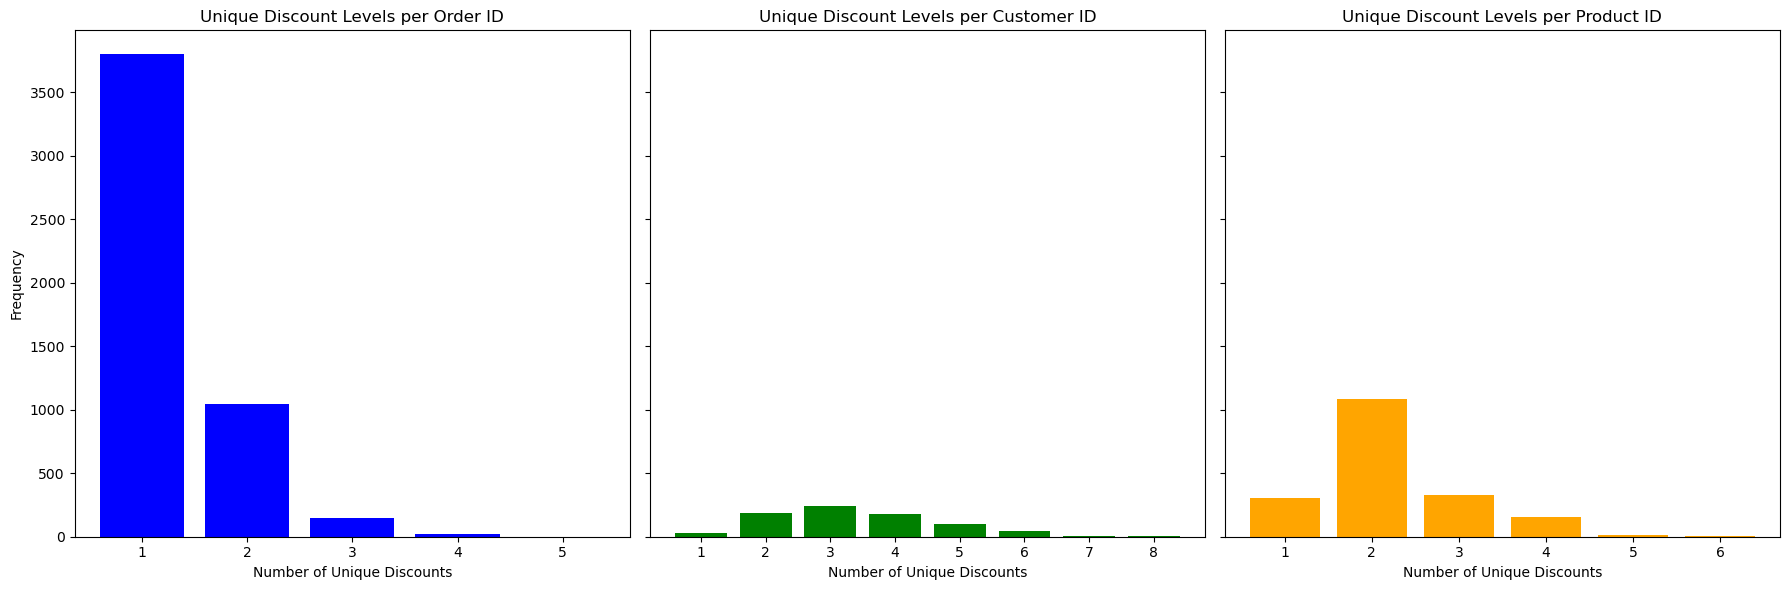

In [21]:
# Analyze the relationship between discount levels and Order ID, Customer ID, and Product ID
order_discount_info = df.groupby('order_id')['discount'].nunique()
customer_discount_info = df.groupby('customer_id')['discount'].nunique()
product_discount_info = df.groupby('product_id')['discount'].nunique()

import matplotlib.pyplot as plt

# Create a figure with three subplots next to each other
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histogram for unique discount levels per Order ID
axes[0].bar(order_discount_info.value_counts().index, order_discount_info.value_counts().values, color='blue')
axes[0].set_title('Unique Discount Levels per Order ID')
axes[0].set_xlabel('Number of Unique Discounts')
axes[0].set_ylabel('Frequency')

# Plot histogram for unique discount levels per Customer ID
axes[1].bar(customer_discount_info.value_counts().index, customer_discount_info.value_counts().values, color='green')
axes[1].set_title('Unique Discount Levels per Customer ID')
axes[1].set_xlabel('Number of Unique Discounts')

# Plot histogram for unique discount levels per Product ID
axes[2].bar(product_discount_info.value_counts().index, product_discount_info.value_counts().values, color='orange')
axes[2].set_title('Unique Discount Levels per Product ID')
axes[2].set_xlabel('Number of Unique Discounts')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [22]:
import csv

# Filter product_ids meeting the conditions
filtered_products = df.groupby('product_id').filter(
    lambda x: x['discount'].nunique() >= 3 and 
              x['customer_id'].nunique() >= 2 and 
              len(x) >= 10
)

# Identify the first product_id meeting the conditions
first_product_id = filtered_products['product_id'].iloc[0] if not filtered_products.empty else None
first_product_id

# export result to csv file
# Filter dataframe for rows corresponding to the first_product_id
filtered_df = df[df['product_id'] == first_product_id]

# Export the filtered dataframe to a CSV file
filtered_df.to_csv('filtered_first_product_id_records.csv', index=False)
with open('first_product_id.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['first_product_id'])
    writer.writerow([first_product_id])


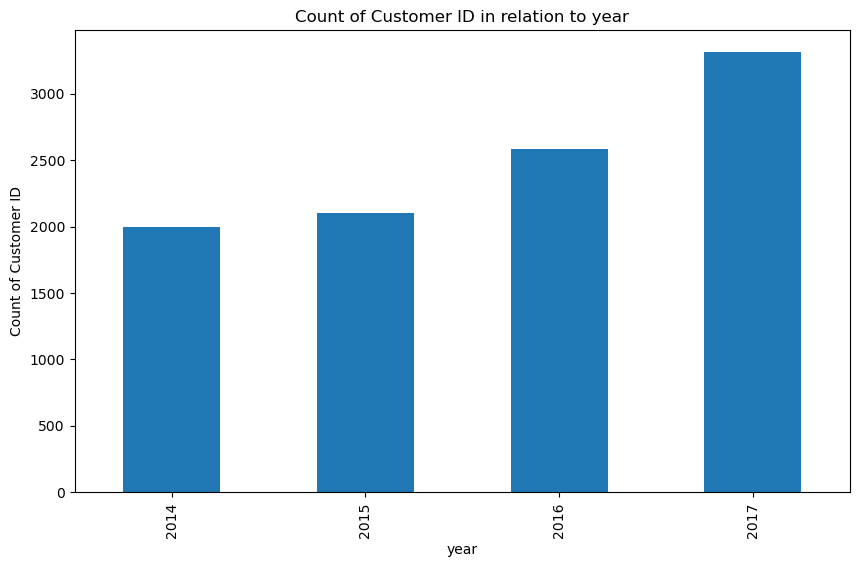

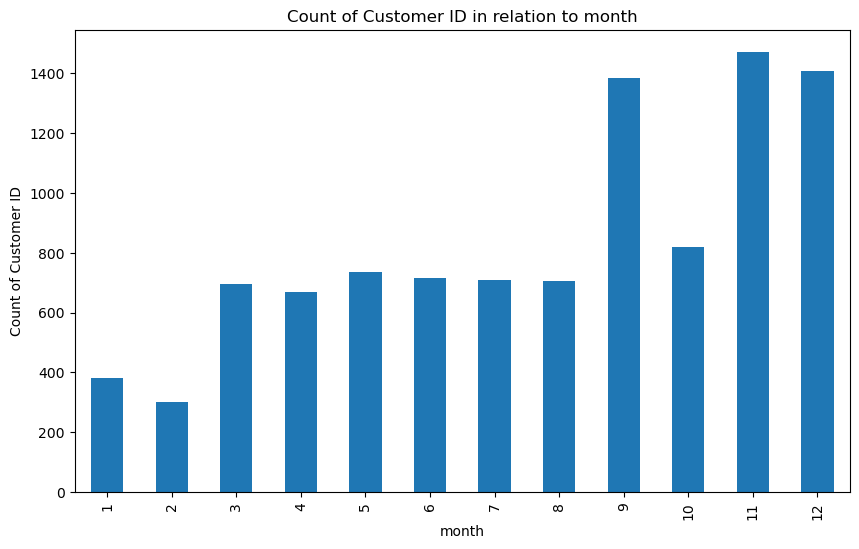

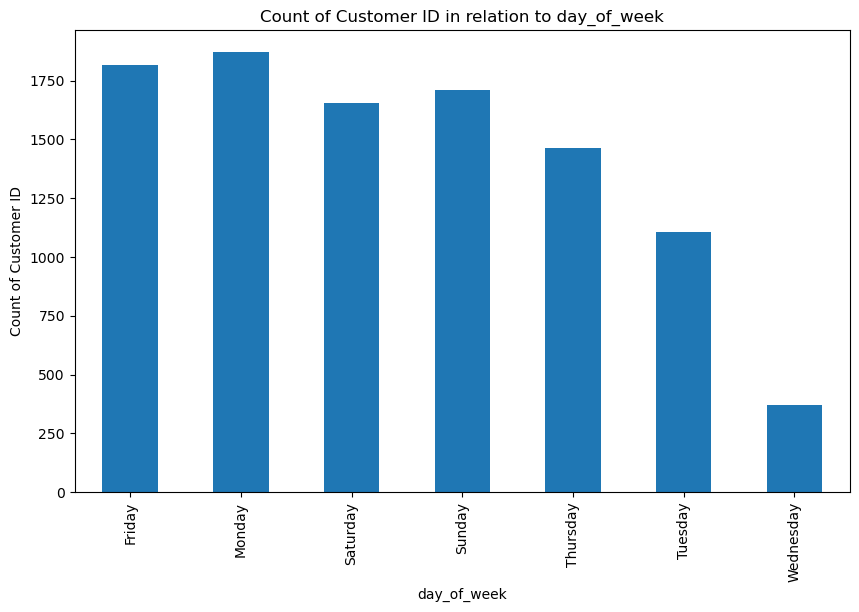

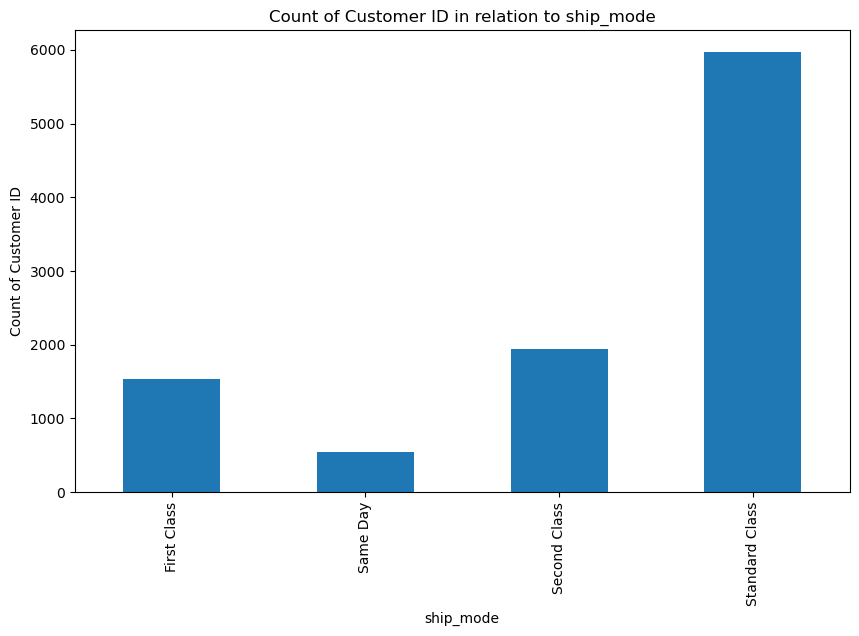

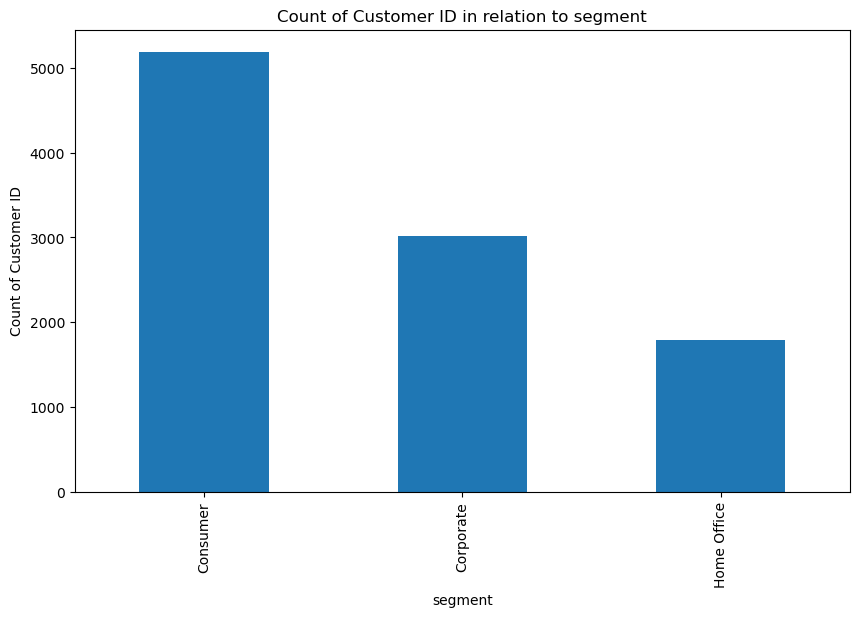

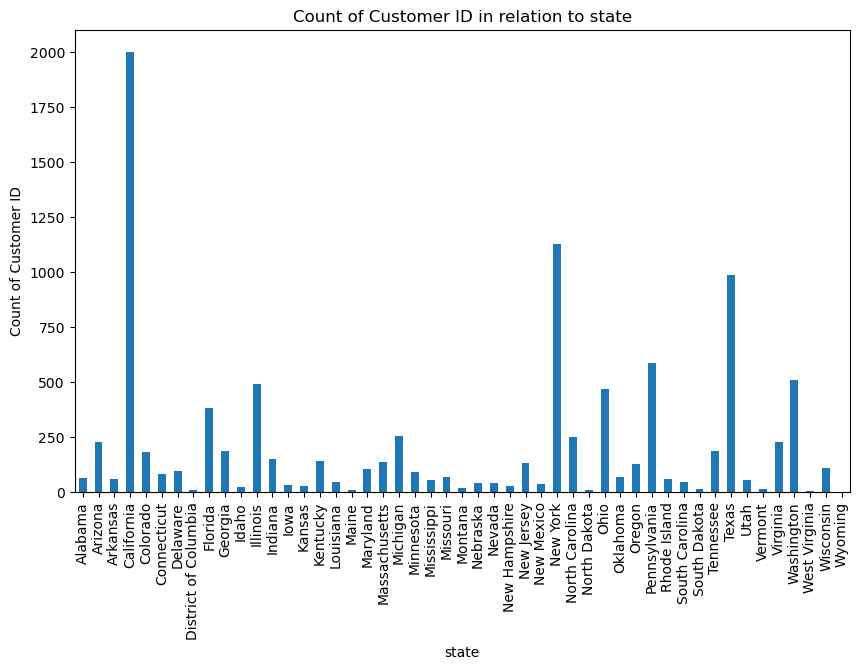

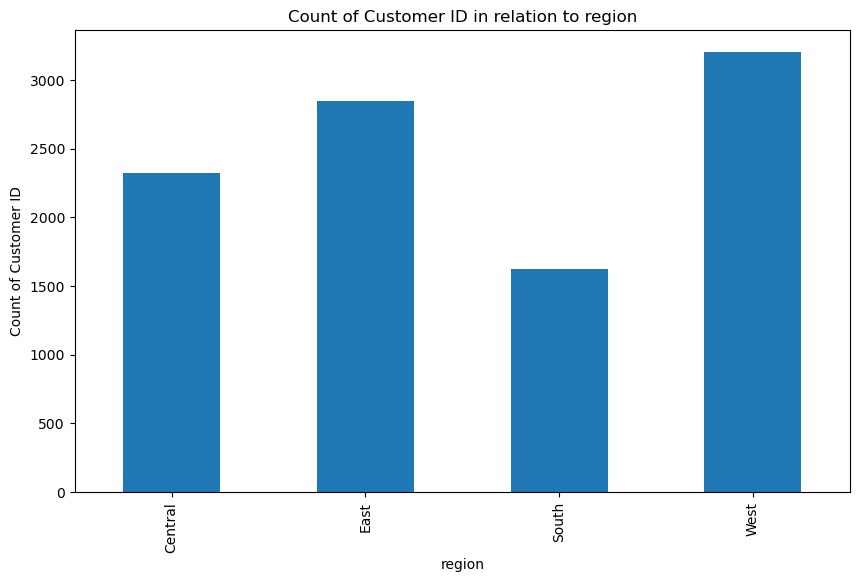

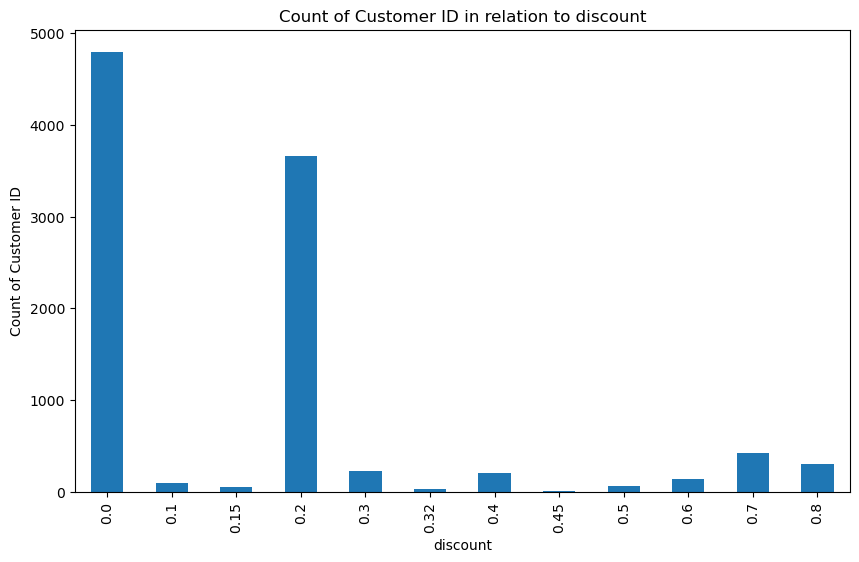

In [23]:
import matplotlib.pyplot as plt

# List of columns to exclude
exclude_columns = ['row_id', 'order_date', 'ship_date', 'order_id', 'category', 'subcategory', 
                   'product_name', 'sales', 'quantity', 'profit', 'customer_id', 'customer_name',
                   'customer_address_key', 'country', 'city', 'postal_code', 'product_id', 'price']

# Loop through all columns in the dataframe
for column in df.columns:
    if column not in exclude_columns and column != 'Customer ID':  # Exclude specified columns and 'Customer ID' itself
        plt.figure(figsize=(10, 6))
        df.groupby(column)['customer_id'].count().plot(kind='bar')
        plt.title(f'Count of Customer ID in relation to {column}')
        plt.xlabel(column)
        plt.ylabel('Count of Customer ID')
        plt.show()

In [24]:
# Create a new column in df between 'segment' and 'country'. New column is called 'customer_address_key'. The value of the new column is a concatenation of 'customer_id' and 'postal_code' with a  separator '-'.
df.insert(df.columns.get_loc('country'), 'customer_address_key', df['customer_id'] + '-' + df['postal_code'].astype(str) + '-' + df['city'] + '-' + df['state'].astype(str))
df.head(20)

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,region,product_id,category,subcategory,product_name,price,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.98,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,7.31,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,348.21,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,13.98,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,6.98,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,1.82,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,188.99,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,7.71,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.98,114.9000,5,0.00,34.4700


In [25]:
df.head(20)

,row_id,order_id,order_date,year,month,day_of_week,ship_date,ship_mode,customer_id,customer_name,...,region,product_id,category,subcategory,product_name,price,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.98,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016,11,Tuesday,2016-11-11,Second Class,CG-12520,Claire Gute,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",243.98,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016,6,Sunday,2016-06-16,Second Class,DV-13045,Darrin Van Huff,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,7.31,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,348.21,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015,10,Sunday,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,13.98,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,6.98,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,1.82,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,188.99,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,7.71,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014,6,Monday,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,...,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.98,114.9000,5,0.00,34.4700


In [26]:
# check with filter on city = 'San Francisco' whether multiple postal codes exist for the same city
df[df['city'] == 'San Francisco'].groupby('postal_code')['city'].nunique().reset_index()

,postal_code,city
0,94109,1
1,94110,1
2,94122,1


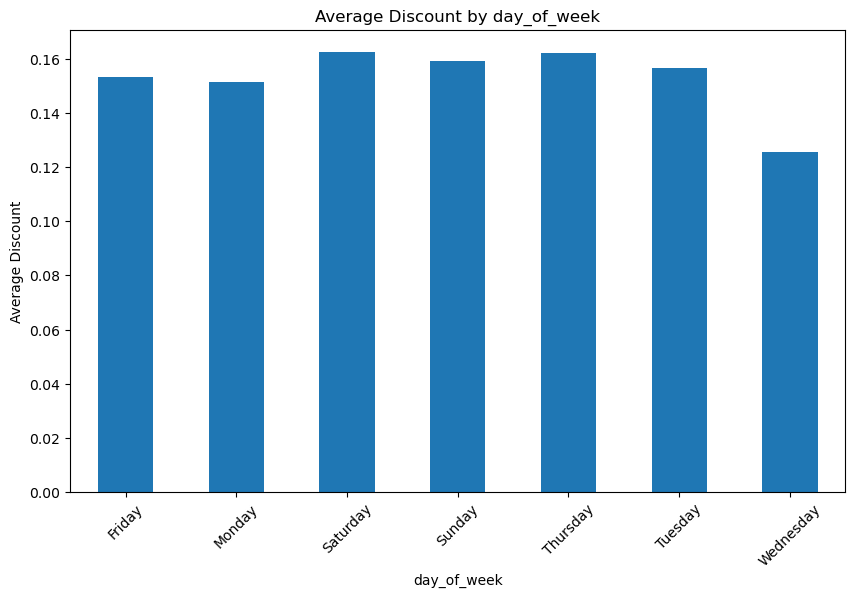

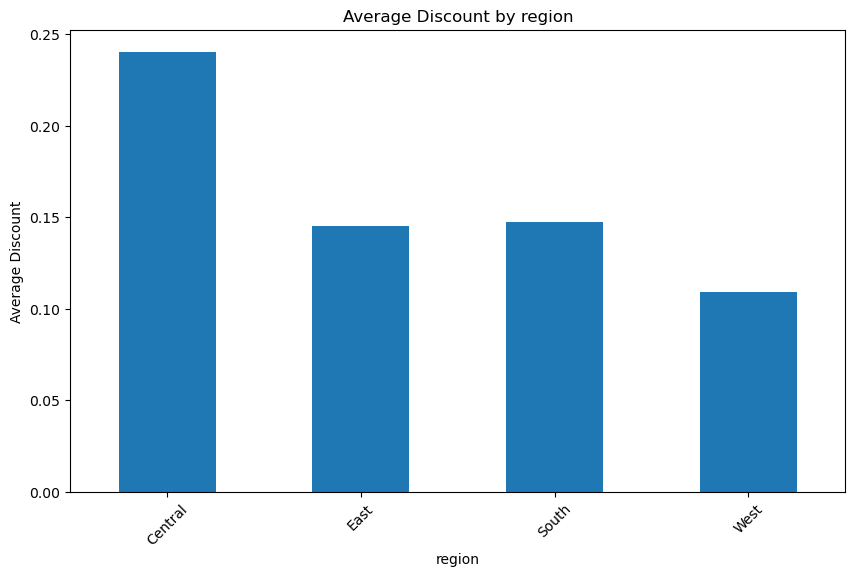

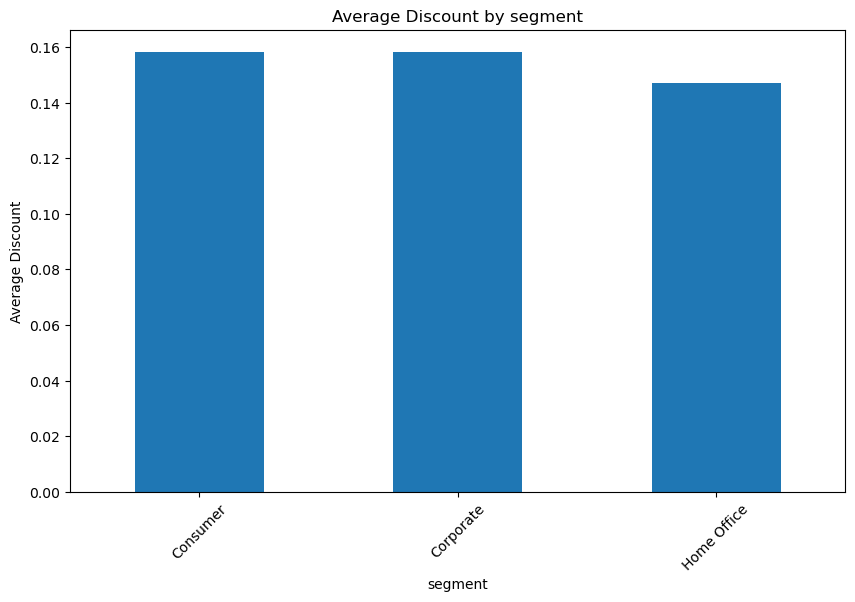

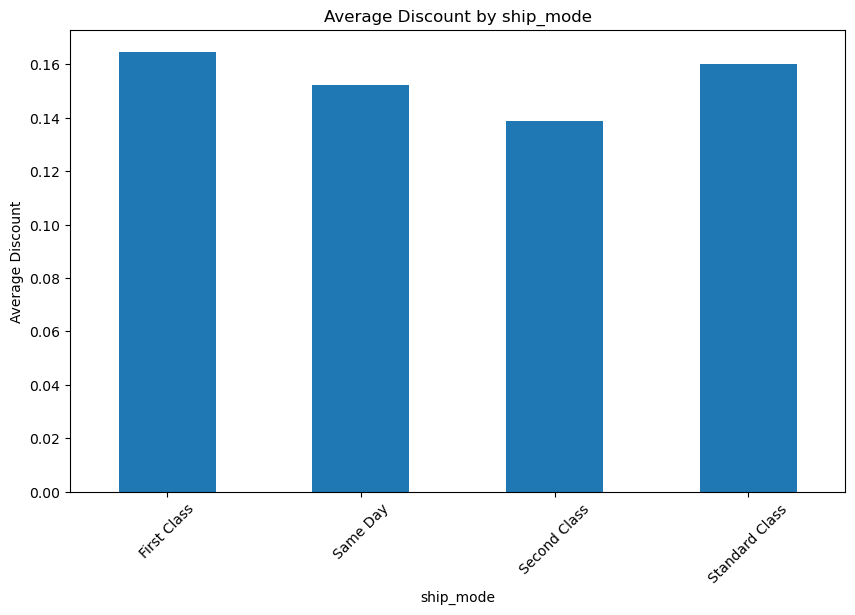

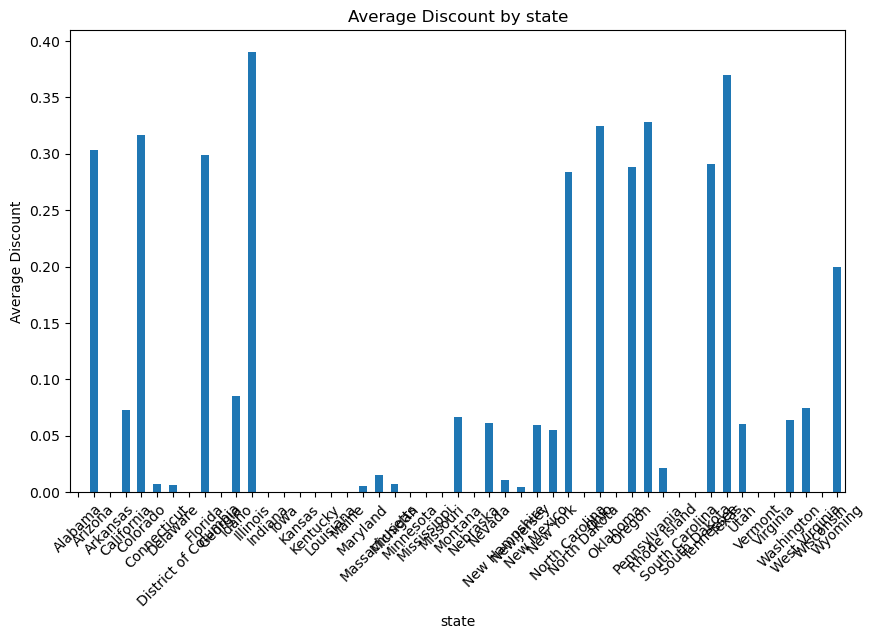

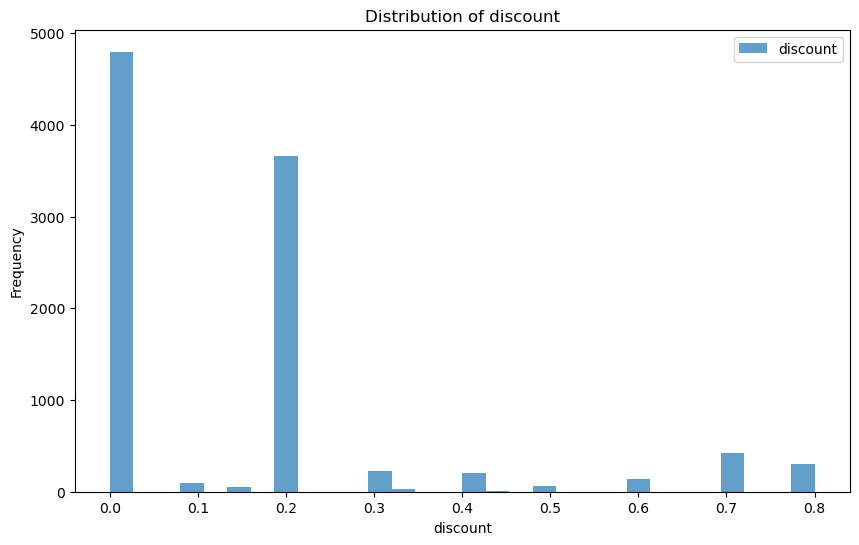

In [27]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.difference(exclude_columns)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_columns + ['Discount'])

# Generate bar plots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df.groupby(column)['discount'].mean().plot(kind='bar')
    plt.title(f'Average Discount by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Discount')
    plt.xticks(rotation=45)
    plt.show()

# Generate histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, alpha=0.7, label=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

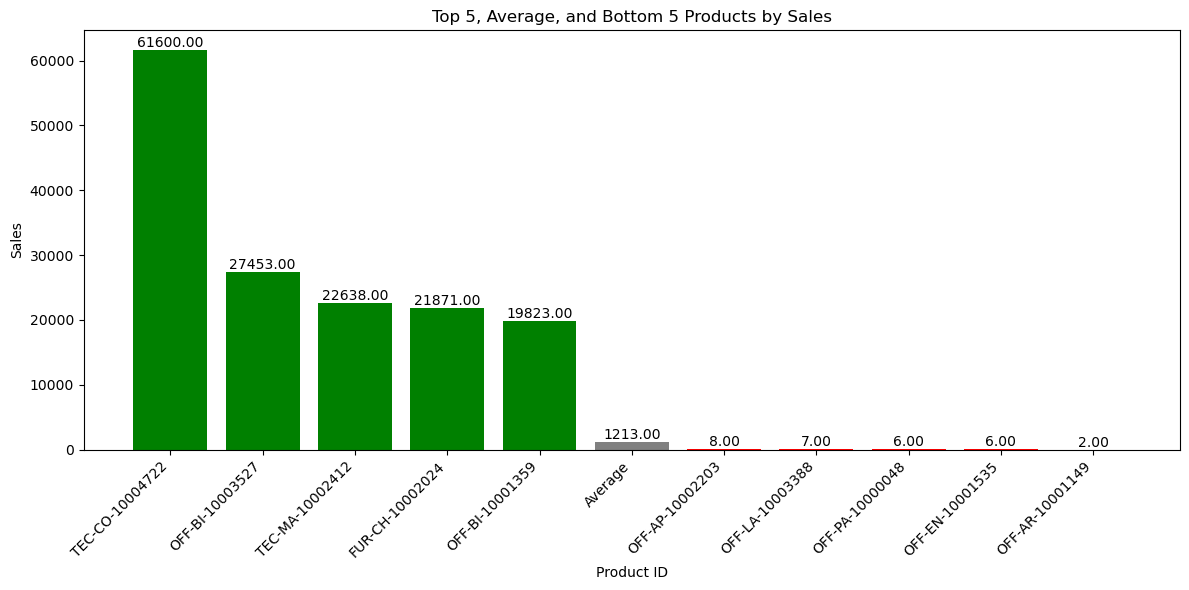

In [28]:
import matplotlib.pyplot as plt

# Calculate total sales for each product_id
product_sales = df.groupby('product_id')['sales'].sum().round(0).astype(int)

# Get the top 5 and bottom 5 product_ids based on total sales
top_5_products = product_sales.nlargest(5)
bottom_5_products = product_sales.nsmallest(5)

# Calculate the average sales across all records
average_sales = int(round(product_sales.mean()))

# Prepare data for the bar chart
labels = list(top_5_products.index) + ['Average'] + list(bottom_5_products.index)
values = list(map(int, top_5_products.values)) + [int(average_sales)] + list(map(int, bottom_5_products.sort_values(ascending=False).values))
colors = ['green'] * 5 + ['grey'] + ['red'] * 5

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=colors)
plt.title('Top 5, Average, and Bottom 5 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')
plt.show()

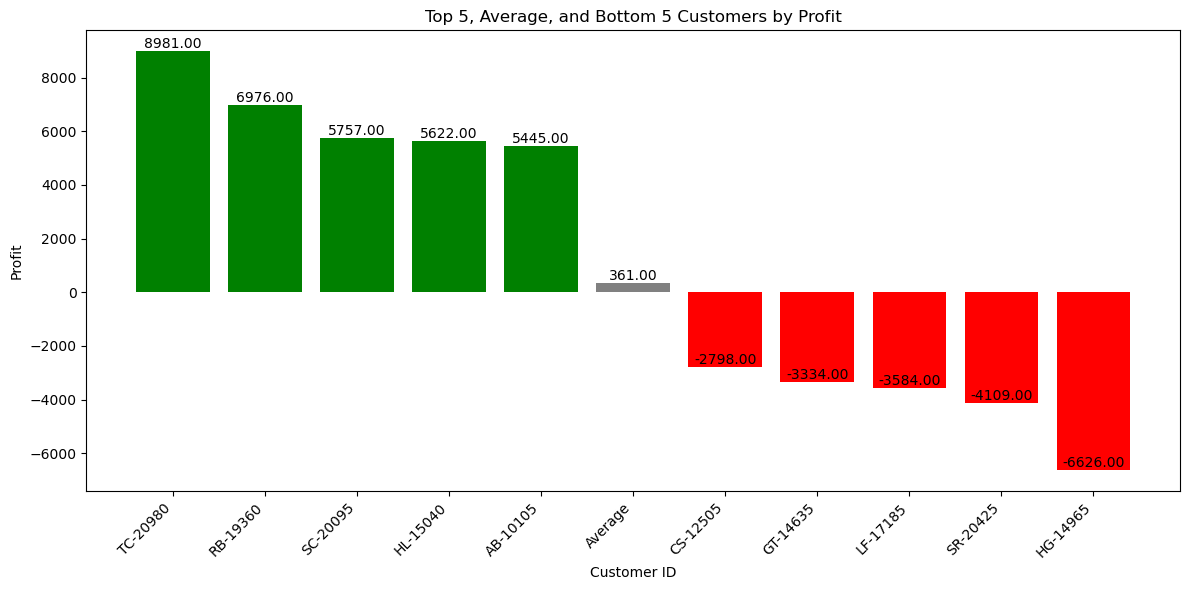

In [29]:
# Calculate total profit for each customer_id
customer_profit = df.groupby('customer_id')['profit'].sum().round(0).astype(int)

# Get the top 5 and bottom 5 customer_ids based on total profit
top_5_customers = customer_profit.nlargest(5)
bottom_5_customers = customer_profit.nsmallest(5)

# Calculate the average profit across all records
average_profit = int(round(customer_profit.mean()))

# Prepare data for the bar chart
labels = list(top_5_customers.index) + ['Average'] + list(bottom_5_customers.index)
values = list(map(int, top_5_customers.values)) + [int(average_profit)] + list(map(int, bottom_5_customers.sort_values(ascending=False).values))
colors = ['green'] * 5 + ['grey'] + ['red'] * 5

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=colors)
plt.title('Top 5, Average, and Bottom 5 Customers by Profit')
plt.xlabel('Customer ID')
plt.ylabel('Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10, color='black')
plt.show()

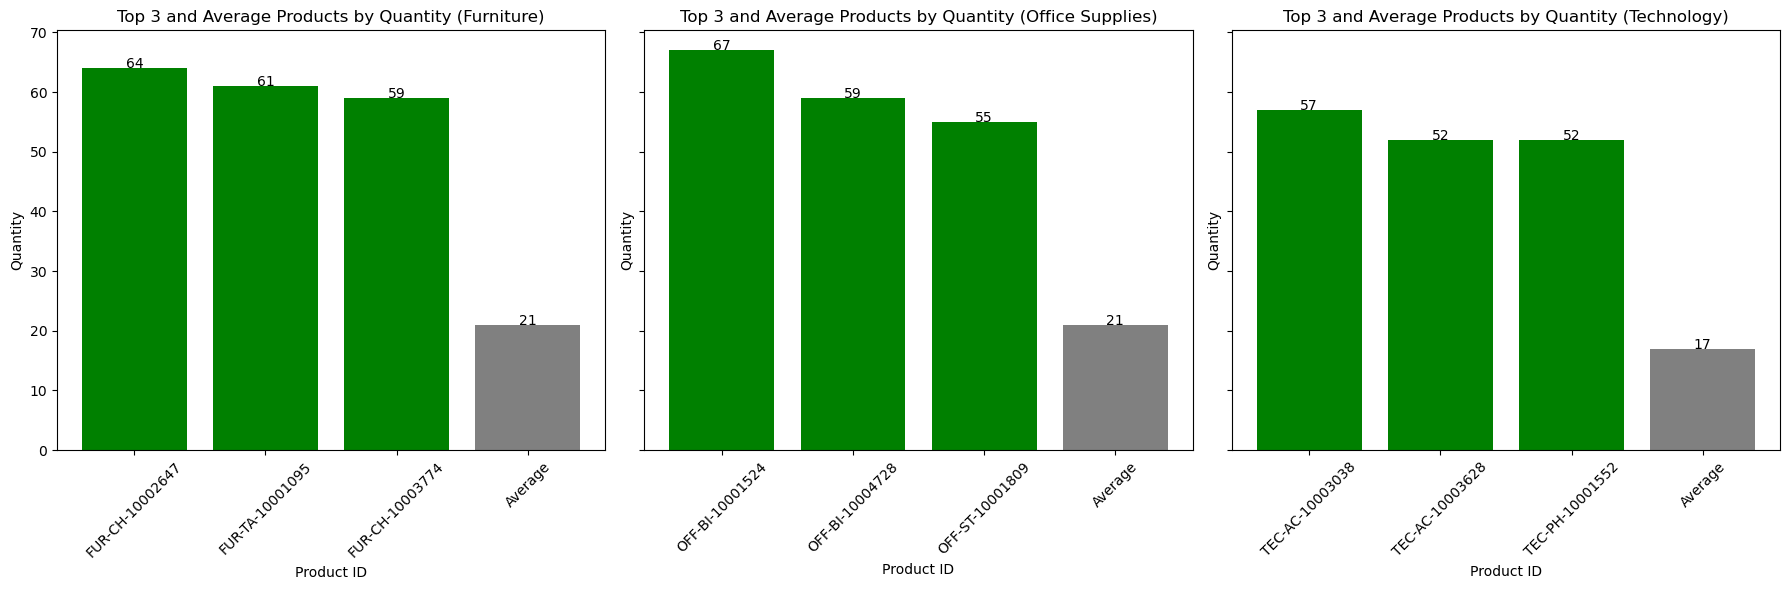

In [30]:
# Get unique categories
categories = df['category'].unique()

# Calculate the total quantity of products grouped by product_id and category
product_quantity = df.groupby(['product_id', 'category'])['quantity'].sum()

# Create a figure with three subplots next to each other
fig, axes = plt.subplots(1, len(categories), figsize=(18, 6), sharey=True)

# Loop through each category and create a plot
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data = product_quantity.xs(category, level='category').nlargest(3)
    
    # Calculate the average quantity for the current category
    average_quantity = int(round(product_quantity.xs(category, level='category').mean()))
    
    # Prepare data for the bar chart
    labels = list(category_data.index) + ['Average']
    values = list(map(int, category_data.values)) + [average_quantity]
    colors = ['green'] * len(category_data) + ['grey']
    
    # Create the bar chart
    bars = axes[i].bar(labels, values, color=colors)
    axes[i].set_title(f'Top 3 and Average Products by Quantity ({category})')
    axes[i].set_xlabel('Product ID')
    axes[i].set_ylabel('Quantity')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add values on top of each bar
    for bar in bars:
        axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{bar.get_height()}', 
                     ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout and display the plots
plt.tight_layout()

plt.show()


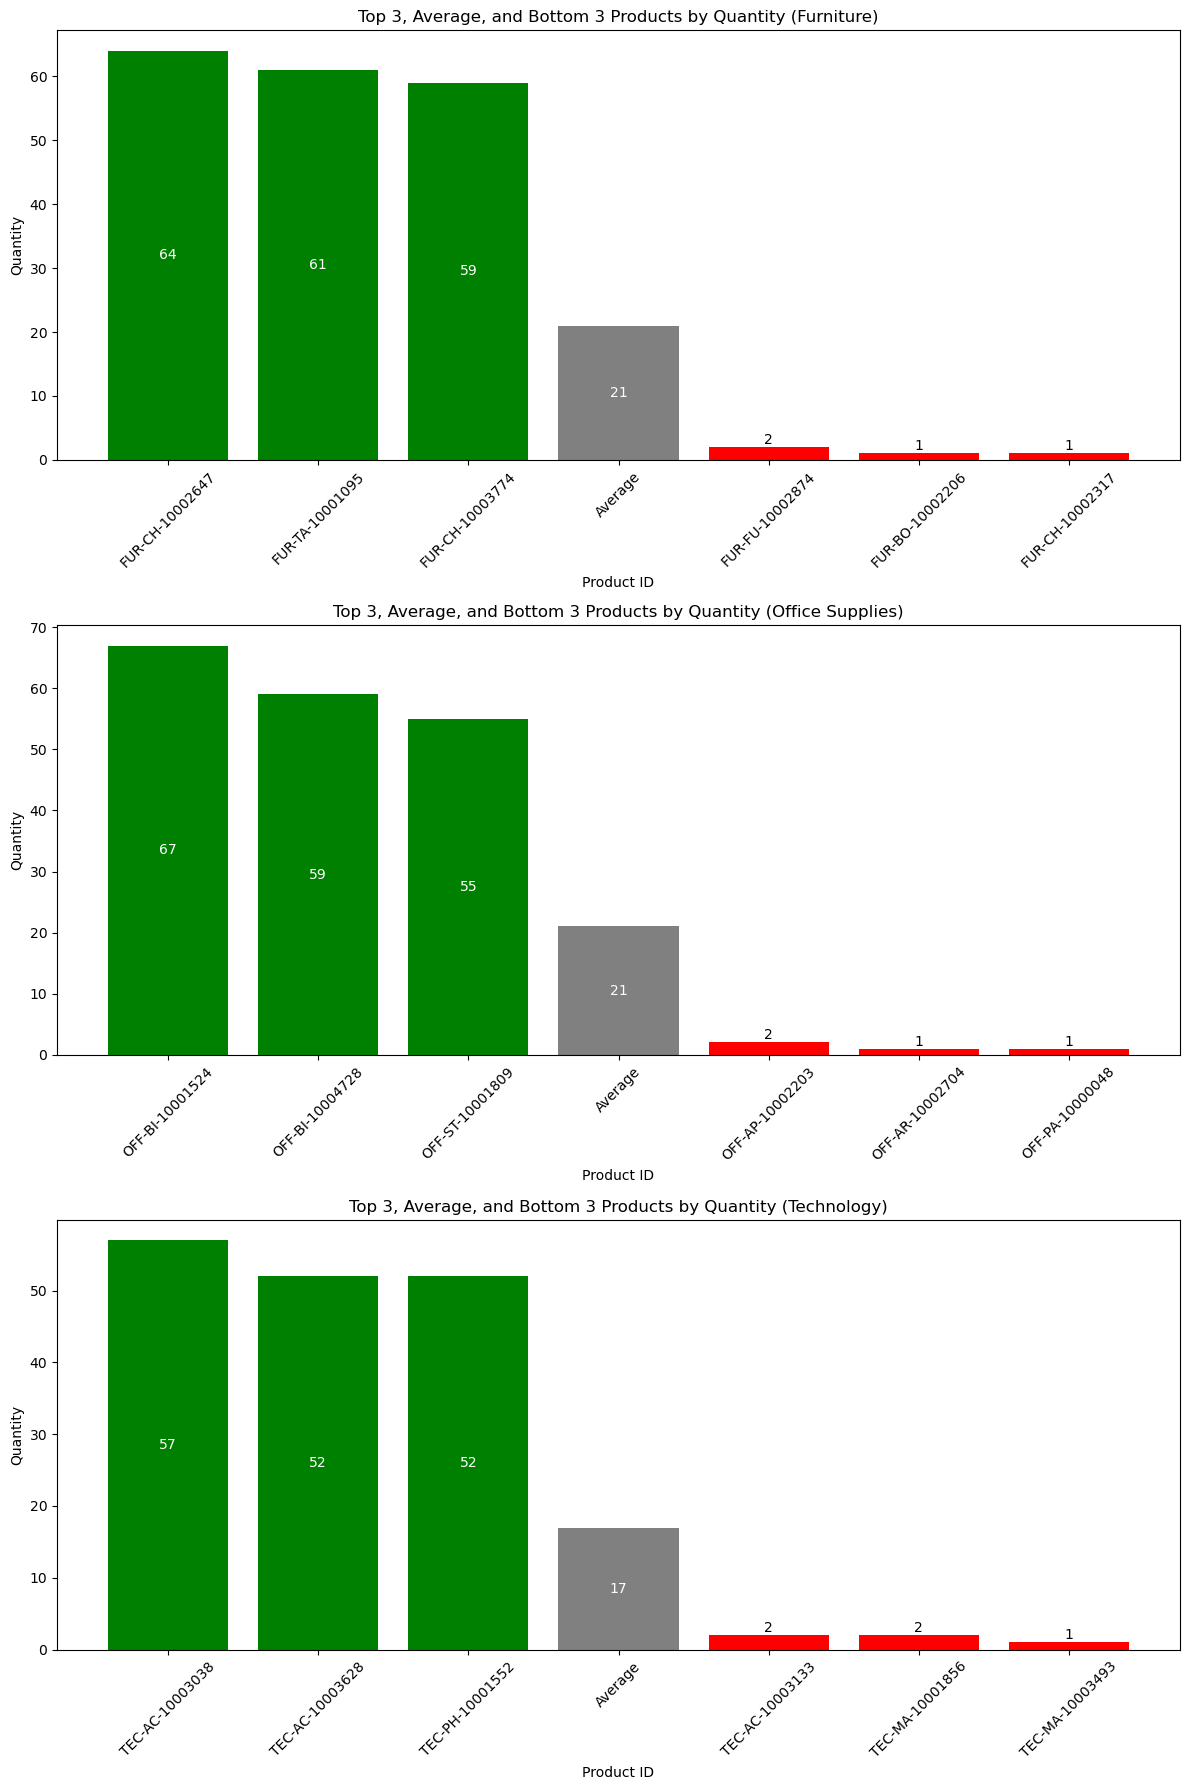

In [31]:
# Get unique categories
categories = df['category'].unique()

# Calculate the total quantity of products grouped by product_id and category
product_quantity = df.groupby(['product_id', 'category'])['quantity'].sum()

# Create a figure with subplots below each other
fig, axes = plt.subplots(len(categories), 1, figsize=(12, 18), sharex=False)

# Loop through each category and create a plot
for i, category in enumerate(categories):
    # Filter data for the current category
    category_data_top = product_quantity.xs(category, level='category').nlargest(3)
    category_data_bottom = product_quantity.xs(category, level='category').nsmallest(3).sort_values(ascending=False)
    
    # Calculate the average quantity for the current category
    average_quantity = int(round(product_quantity.xs(category, level='category').mean()))
    
    # Prepare data for the bar chart
    labels = list(category_data_top.index) + ['Average'] + list(category_data_bottom.index)
    values = list(map(int, category_data_top.values)) + [average_quantity] + list(map(int, category_data_bottom.values))
    colors = ['green'] * len(category_data_top) + ['grey'] + ['red'] * len(category_data_bottom)
    
    # Create the bar chart
    bars = axes[i].bar(labels, values, color=colors)
    axes[i].set_title(f'Top 3, Average, and Bottom 3 Products by Quantity ({category})')
    axes[i].set_xlabel('Product ID')
    axes[i].set_ylabel('Quantity')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add values on top of each bar
    for bar in bars:
        bar_value = bar.get_height()
        if bar_value < 10:
            axes[i].text(bar.get_x() + bar.get_width() / 2, bar_value, f'{bar_value}', 
                         ha='center', va='bottom', fontsize=10, color='black')
        else:
            axes[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar_value / 2, f'{bar_value}', 
                         ha='center', va='center', fontsize=10, color='white')
        
# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [32]:
# Look top-selling product by subcategory

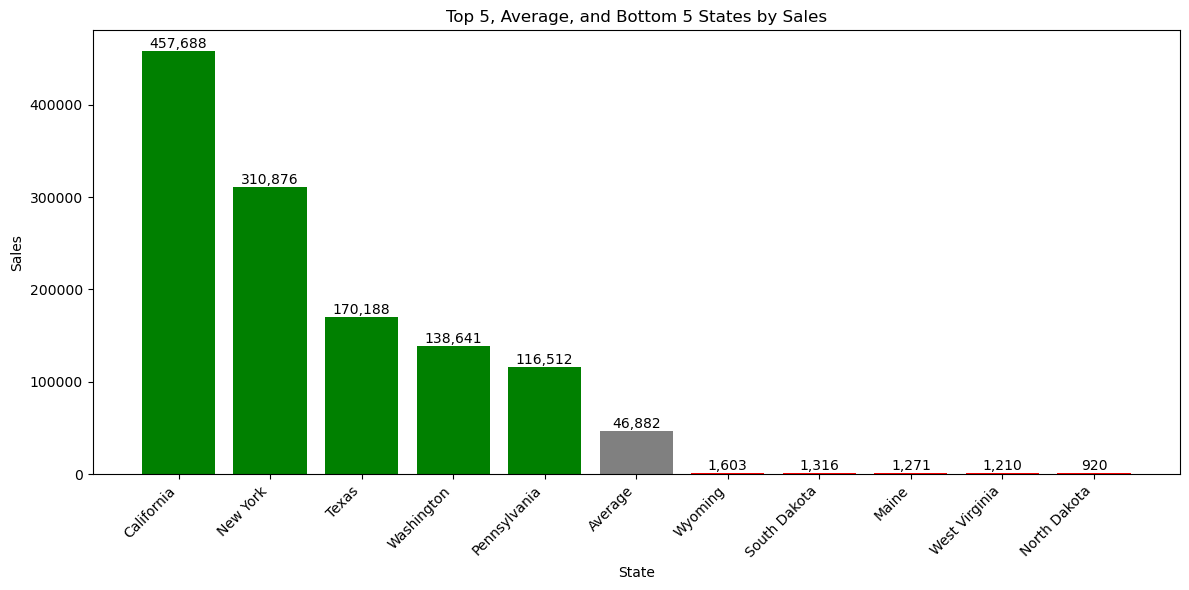

In [33]:
# Calculate total sales for each state
state_sales = df.groupby('state')['sales'].sum().round(0).astype(int)

# Get the top 5 and bottom 5 states based on total sales
top_5_states = state_sales.nlargest(5)
bottom_5_states = state_sales.nsmallest(5)

# Calculate the average sales across all states
average_state_sales = int(round(state_sales.mean()))

# Prepare data for the bar chart
# Prepare data for the bar chart
values = list(map(int, top_5_states.values)) + [average_state_sales] + list(map(int, bottom_5_states.values))
labels = list(top_5_states.index) + ['Average'] + list(bottom_5_states.index)
colors = ['green'] * len(top_5_states) + ['grey'] + ['red'] * len(bottom_5_states)

# Sort values and adjust labels and colors accordingly
sorted_indices = sorted(range(len(values)), key=lambda i: values[i], reverse=True)
values = [values[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color=colors)
plt.title('Top 5, Average, and Bottom 5 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Display the chart
plt.show()


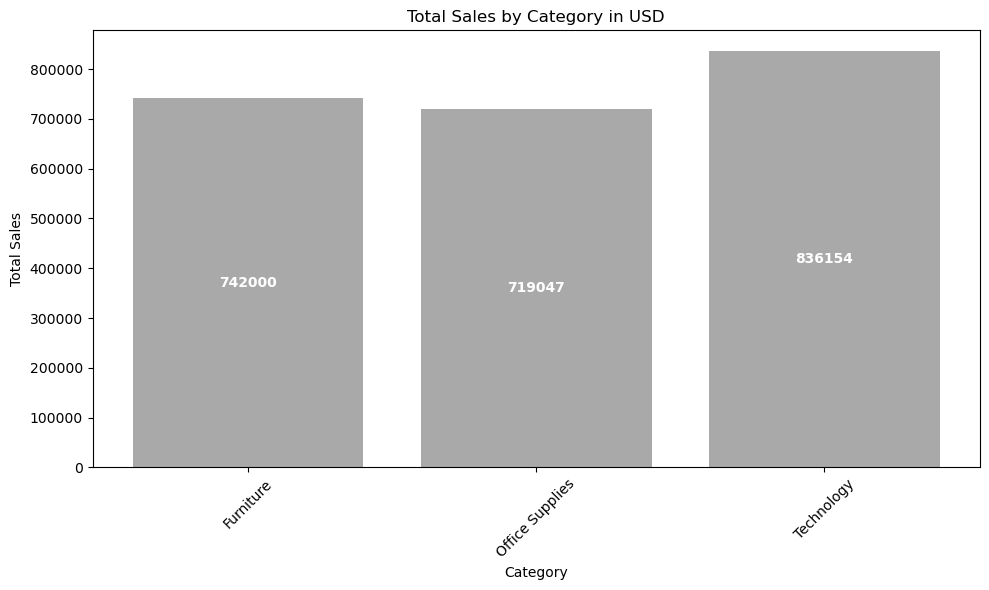

In [34]:
import matplotlib.pyplot as plt

# Calculate total sales for each category
category_sales = df.groupby('category')['sales'].sum().round(0).astype(int)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales.index, category_sales.values, color='darkgrey')

# Add values on top of each bar
for bar, value in zip(bars, category_sales.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
             f'{value}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set chart title and labels
plt.title('Total Sales by Category in USD')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

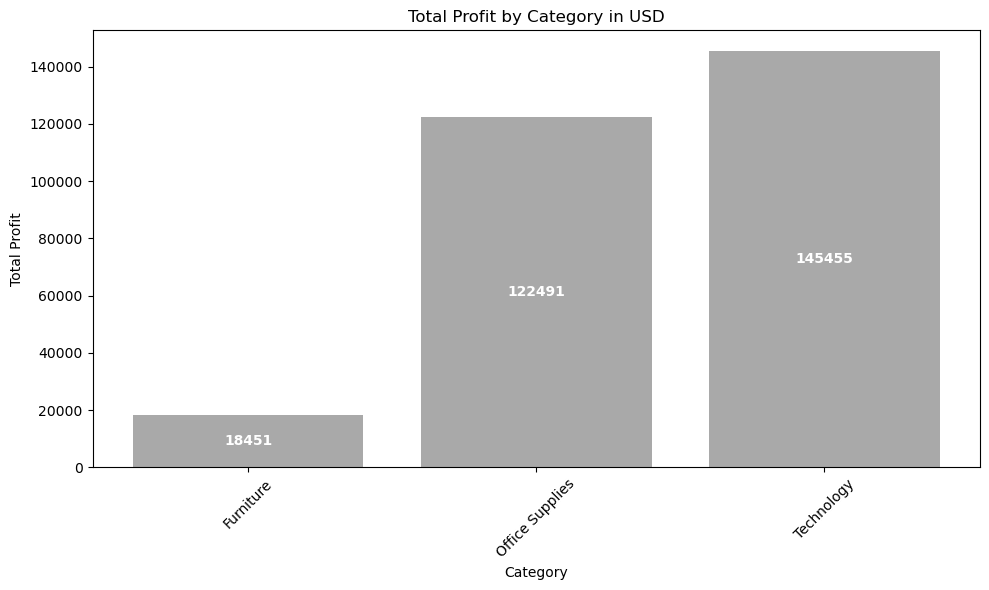

In [35]:
import matplotlib.pyplot as plt

# Calculate total profit for each category
category_profit = df.groupby('category')['profit'].sum().round(0).astype(int)

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_profit.index, category_profit.values, color='darkgrey')

# Add values on top of each bar
for bar, value in zip(bars, category_profit.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
             f'{value}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Set chart title and labels
plt.title('Total Profit by Category in USD')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

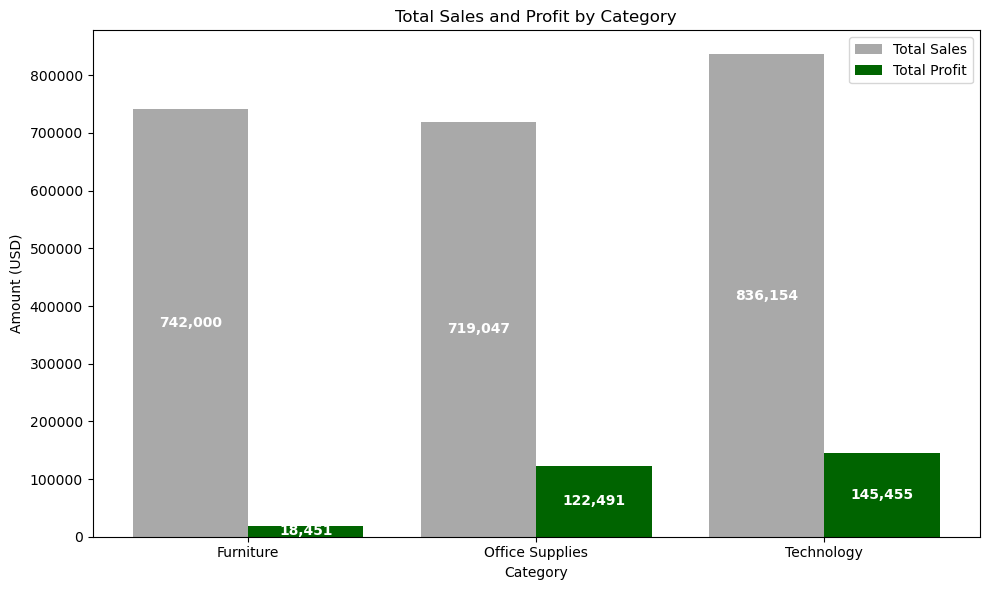

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.4

# Define positions for the bars
categories = category_sales.index
x = range(len(categories))

# Plot total sales
sales_bars = ax.bar(x, category_sales.values, width=bar_width, color='darkgrey', label='Total Sales')

# Plot total profit next to sales
profit_bars = ax.bar([pos + bar_width for pos in x], category_profit.values, width=bar_width, color='darkgreen', label='Total Profit')

# Set labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Amount (USD)')
ax.set_title('Total Sales and Profit by Category')
ax.set_xticks([pos + bar_width / 2 for pos in x])
ax.set_xticklabels(categories)

# Add values inside each bar
for bar in sales_bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_height()):,}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

for bar in profit_bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, 
            f'{int(bar.get_height()):,}', ha='center', va='center', fontsize=10, color='white', fontweight='bold')

# Add legend
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

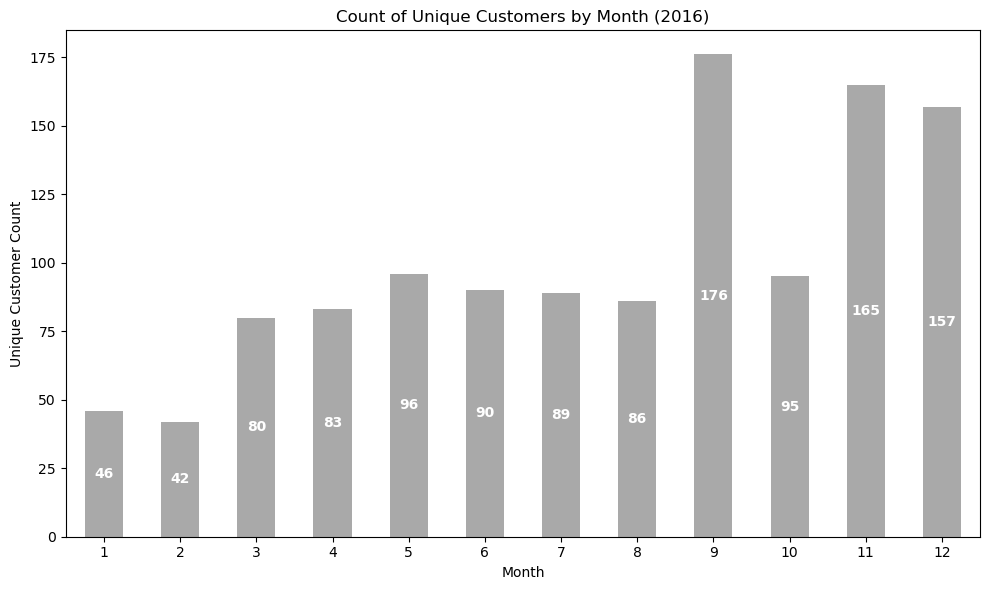

In [37]:
# Filter the dataframe for the year 2016
df_2016 = df[df['year'] == 2016]

# Count unique customer_id by month
unique_customers_by_month = df_2016.groupby('month')['customer_id'].nunique()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = unique_customers_by_month.plot(kind='bar', color='darkgrey')
plt.title('Count of Unique Customers by Month (2016)')
plt.xlabel('Month')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=0)

# Add values on top of each bar
for bar in bars.patches:
    bar_value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar_value / 2, 
             f'{int(bar_value)}', ha='center', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [38]:
# Export df to csv file
df.to_csv('Sample-Superstore_cleaned.csv', index=False)